#######################################################################
##                                                                   ##
##                   Poiseuille Flow Stability Analysis              ##
##                   Seyed Mohammad Amin Hosseini                    ##
##     -------------------------------------------------------       ##
##          Computes Neutral Curve and Perturbations                ##
#######################################################################


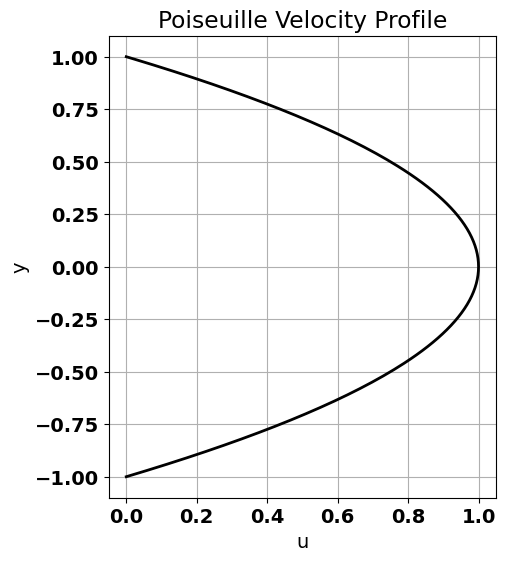

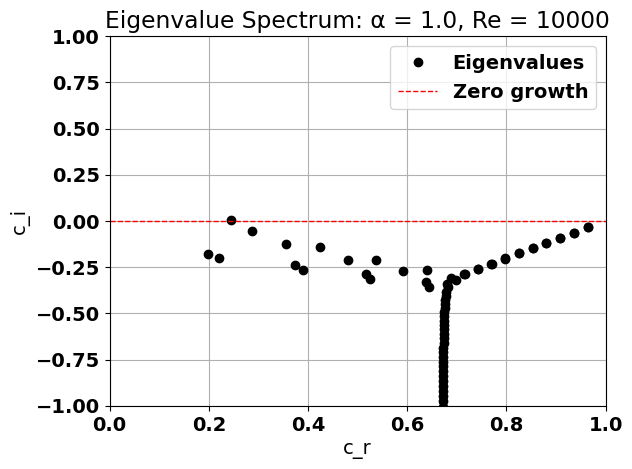

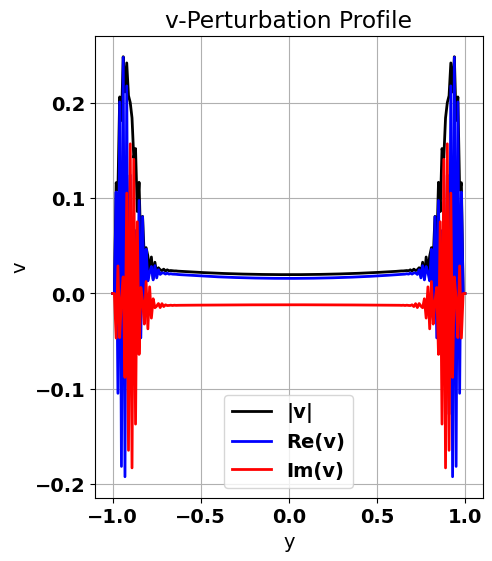

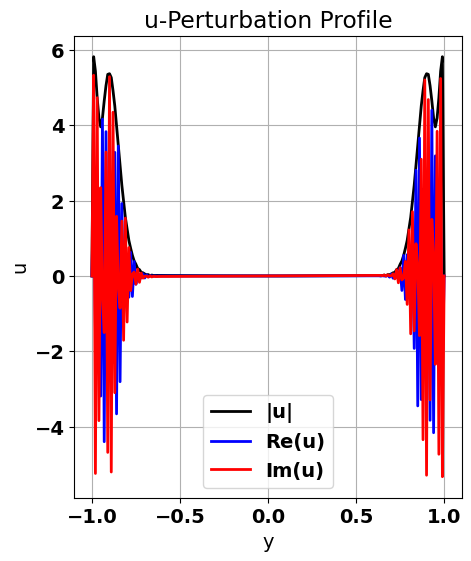

alpha = 0.01, Re = 5000, Progress: 0.02%
alpha = 0.01, Re = 5500, Progress: 0.05%
alpha = 0.01, Re = 6000, Progress: 0.07%
alpha = 0.01, Re = 6500, Progress: 0.09%
alpha = 0.01, Re = 7000, Progress: 0.12%
alpha = 0.01, Re = 7500, Progress: 0.14%
alpha = 0.01, Re = 8000, Progress: 0.16%
alpha = 0.01, Re = 8500, Progress: 0.19%
alpha = 0.01, Re = 9000, Progress: 0.21%
alpha = 0.01, Re = 9500, Progress: 0.23%
alpha = 0.01, Re = 10000, Progress: 0.26%
alpha = 0.01, Re = 10500, Progress: 0.28%
alpha = 0.01, Re = 11000, Progress: 0.31%
alpha = 0.01, Re = 11500, Progress: 0.33%
alpha = 0.01, Re = 12000, Progress: 0.35%
alpha = 0.01, Re = 12500, Progress: 0.38%
alpha = 0.01, Re = 13000, Progress: 0.40%
alpha = 0.01, Re = 13500, Progress: 0.42%
alpha = 0.01, Re = 14000, Progress: 0.45%
alpha = 0.01, Re = 14500, Progress: 0.47%
alpha = 0.01, Re = 15000, Progress: 0.49%
alpha = 0.01, Re = 15500, Progress: 0.52%
alpha = 0.01, Re = 16000, Progress: 0.54%
alpha = 0.01, Re = 16500, Progress: 0.56%
al

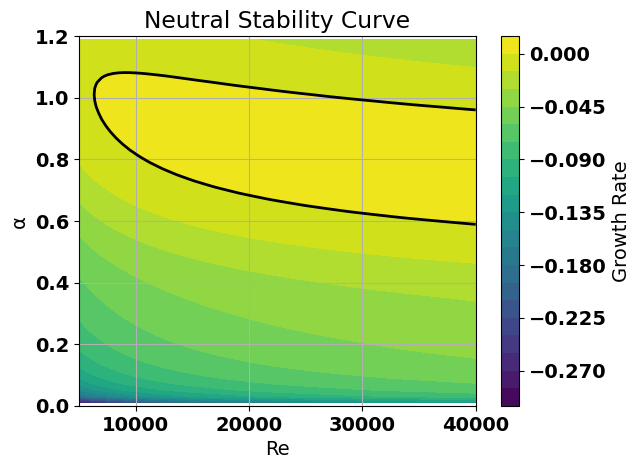

In [ ]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Display initial message
print("#######################################################################")
print("##                                                                   ##")
print("##                   Poiseuille Flow Stability Analysis              ##")
print("##                   Temporal Stability - Python                    ##")
print("##     -------------------------------------------------------       ##")
print("##          Computes Neutral Curve and Perturbations                ##")
print("#######################################################################")

### Function Definitions

def get_poiseuille_profile(N):
    """
    Generate the parabolic velocity profile u = 1 - y^2 for Poiseuille flow.

    Parameters:
    - N (int): Number of grid points

    Returns:
    - u (ndarray): Velocity profile
    - ddu (ndarray): Second derivative of velocity
    - y (ndarray): Spatial grid from -1 to 1
    - dy (float): Grid spacing
    """
    y = np.linspace(-1, 1, N)      # Channel domain: y = -1 to 1
    dy = y[1] - y[0]               # Grid spacing
    u = 1 - y**2                   # Parabolic velocity profile
    ddu = -2 * np.ones_like(y)     # Second derivative: d^2u/dy^2 = -2
    return u, ddu, y, dy

def solve_orr_sommerfeld(u, ddu, dy, Re, alpha, N):
    """
    Solve the Orr-Sommerfeld eigenvalue problem using finite differences.

    Parameters:
    - u (ndarray): Velocity profile
    - ddu (ndarray): Second derivative of velocity
    - dy (float): Grid spacing
    - Re (float): Reynolds number
    - alpha (float): Wavenumber
    - N (int): Number of grid points

    Returns:
    - c (ndarray): Eigenvalues
    - v (ndarray): Eigenvectors
    """
    N1 = N - 4  # Interior points after applying boundary conditions
    # Preallocate coefficient arrays
    E = np.zeros(N1, dtype=complex)
    C = np.zeros(N1, dtype=complex)
    A = np.zeros(N1, dtype=complex)
    B = np.zeros(N1, dtype=complex)
    D = np.zeros(N1, dtype=complex)

    # Finite difference coefficients
    for i in range(N1):
        j = i + 2  # Index offset to interior points (y[2] to y[N-3])
        E[i] = 1j / (Re * alpha * dy**4)  # Fourth derivative term
        C[i] = 1j / (Re * alpha) * (-4 / dy**4 - 2 * alpha**2 / dy**2) + u[j] / dy**2
        A[i] = (1j / (Re * alpha) * (6 / dy**4 + 4 * alpha**2 / dy**2 + alpha**4) -
                2 * u[j] / dy**2 - u[j] * alpha**2 - ddu[j])
        B[i] = 1j / (Re * alpha) * (-4 / dy**4 - 2 * alpha**2 / dy**2) + u[j] / dy**2
        D[i] = 1j / (Re * alpha) / dy**4

    # Construct pentadiagonal matrix AMT
    AMT = (np.diag(A[::-1], k=0) +
           np.diag(C[::-1][:-1], k=1) +
           np.diag(E[::-1][:-2], k=2) +
           np.diag(B[::-1][1:], k=-1) +
           np.diag(D[::-1][2:], k=-2))

    # Construct tridiagonal matrix BMT
    BCAP = np.ones(N1) / dy**2
    ACAP = (-2 / dy**2 - alpha**2) * np.ones(N1)
    CCAP = np.ones(N1) / dy**2
    BMT = (np.diag(ACAP[::-1], k=0) +
           np.diag(CCAP[::-1][:-1], k=1) +
           np.diag(BCAP[::-1][1:], k=-1))

    # Solve generalized eigenvalue problem: AMT v = c BMT v
    c, v = eig(AMT, BMT)
    return c, v

### Main Program

# Parameters
N = 201  # Number of grid points
u, ddu, y, dy = get_poiseuille_profile(N)

# Plot 1: Base Velocity Profile
plt.figure(1)
plt.plot(u, y, '-k', linewidth=2)
plt.xlabel('u')
plt.ylabel('y')
plt.title('Poiseuille Velocity Profile')
plt.grid(True)
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})
plt.gcf().set_size_inches(5, 6)
plt.show()

# Single case eigenvalue computation
alpha = 1.0  # Wavenumber
Re = 10000   # Reynolds number
c, v = solve_orr_sommerfeld(u, ddu, dy, Re, alpha, N)

# Plot 2: Eigenvalue Spectrum
plt.figure(2)
plt.plot(np.real(c), np.imag(c), 'ok', linewidth=2, label='Eigenvalues')
plt.plot([0, 1], [0, 0], '--r', linewidth=1, label='Zero growth')
plt.xlabel('c_r')
plt.ylabel('c_i')
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.title(f'Eigenvalue Spectrum: α = {alpha}, Re = {Re}')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: v-Perturbation Profile
v_full = np.zeros(N, dtype=complex)
v_full[2:-2] = v[:, 0]  # First eigenvector with no-slip BCs
plt.figure(3)
plt.plot(y, np.abs(v_full), '-k', linewidth=2, label='|v|')
plt.plot(y, np.real(v_full), '-b', linewidth=2, label='Re(v)')
plt.plot(y, np.imag(v_full), '-r', linewidth=2, label='Im(v)')
plt.xlabel('y')
plt.ylabel('v')
plt.title('v-Perturbation Profile')
plt.legend(loc='best')
plt.grid(True)
plt.gcf().set_size_inches(5, 6)
plt.show()

# Compute and Plot 4: u-Perturbation Profile
dv = np.zeros(N, dtype=complex)
for i in range(1, N-1):
    dv[i] = (v_full[i+1] - v_full[i-1]) / (2 * dy)  # Central difference
dv[0] = (v_full[1] - v_full[0]) / dy                # Forward difference
dv[-1] = (v_full[-1] - v_full[-2]) / dy            # Backward difference
u_pert = -dv / (1j * alpha)                         # u from continuity

plt.figure(4)
plt.plot(y, np.abs(u_pert), '-k', linewidth=2, label='|u|')
plt.plot(y, np.real(u_pert), '-b', linewidth=2, label='Re(u)')
plt.plot(y, np.imag(u_pert), '-r', linewidth=2, label='Im(u)')
plt.xlabel('y')
plt.ylabel('u')
plt.title('u-Perturbation Profile')
plt.legend(loc='best')
plt.grid(True)
plt.gcf().set_size_inches(5, 6)
plt.show()

# Neutral Stability Curve Computation
alpha_range = np.arange(0.01, 1.21, 0.02)  # Wavenumber range
Re_range = np.arange(5000, 40001, 500)     # Reynolds number range
growth_rates = np.zeros((len(alpha_range), len(Re_range)))

for i, alpha in enumerate(alpha_range):
    for j, Re in enumerate(Re_range):
        c, _ = solve_orr_sommerfeld(u, ddu, dy, Re, alpha, N)
        # Filter physically relevant eigenvalues
        idx = (np.real(c) > 0) & (np.real(c) < 1) & (np.imag(c) > -1) & (np.imag(c) < 1)
        valid_c = c[idx]
        growth_rates[i, j] = np.max(np.imag(valid_c)) if valid_c.size > 0 else np.nan
        # Progress tracking
        progress = ((i * len(Re_range) + j + 1) / (len(alpha_range) * len(Re_range))) * 100
        print(f'alpha = {alpha:.2f}, Re = {Re:.0f}, Progress: {progress:.2f}%')

# Check growth_rates for plotting
finite_growth = growth_rates[np.isfinite(growth_rates)]
unique_finite = np.unique(finite_growth) if finite_growth.size > 0 else []

# Plot 5: Neutral Stability Curve
plt.figure(5)
contour_plot = plt.contourf(Re_range, alpha_range, growth_rates, 20)
plt.contour(Re_range, alpha_range, growth_rates, levels=[0], colors='k', linewidths=2)
plt.xlabel('Re')
plt.ylabel('α')
plt.xlim([5000, 40000])
plt.ylim([0, 1.2])
plt.title('Neutral Stability Curve')
if len(unique_finite) > 1:
    plt.colorbar(contour_plot, label='Growth Rate')
else:
    print("Warning: Colorbar omitted due to insufficient variation in growth rates.")
plt.grid(True)
plt.show()